In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import heapq


In [2]:
tube_file = pd.read_csv("tubedata.csv", quotechar='"', skipinitialspace=True)
tube_file.columns = ["Start Station", "End Station", "Tube Line", "Average Time", "Main Zone", "Secondary Zone"]
tube_file = tube_file.values.tolist()


In [3]:
# tube_file[342] = ["Heathrow Terminals 1,2,3", "Hatton Cross", "Piccadilly", 3, '6', '0']

In [4]:
for x in range(len(tube_file)):
    try:
        tube_file[x][0] = tube_file[x][0].strip().replace('"', '')
        tube_file[x][1] = tube_file[x][1].strip().replace('"', '')
        tube_file[x][2] = tube_file[x][2].strip().replace('"', '')
        tube_file[x][4] = tube_file[x][4].strip().replace('"', '')
        tube_file[x][5] = tube_file[x][5].strip().replace('"', '')
        
        if tube_file[x][4] == 'a' or tube_file[x][4] == 'b':
            tube_file[x][4] = 7
        elif tube_file[x][4] == 'c':
            tube_file[x][4] = 8
        elif tube_file[x][4] == 'd':
            tube_file[x][4] = 9
        if tube_file[x][5] == 'a' or tube_file[x][5] == 'b':
            tube_file[x][5] = 7
        elif tube_file[x][5] == 'c':
            tube_file[x][5] = 8
        elif tube_file[x][5] == 'd':
            tube_file[x][5] = 9
        
        tube_file[x][4] = int(tube_file[x][4])
        tube_file[x][5] = int(tube_file[x][5])
    except Exception as e:
        print(e)

In [5]:
sample_graph = {
        "Stratford": { "Mile End": { "weight": 5}}
}

In [6]:
tube_dict = dict()



for path in tube_file:
    try:
        temp_path1 = {}
        temp_path1[path[1]] = {"weight": int(path[3]), "tubeline": path[2]}
        temp_path2 = {}
        temp_path2[path[0]] = {"weight": int(path[3]), "tubeline": path[2]}
        if path[0] not in tube_dict.keys():
            tube_dict[path[0]] = temp_path1
        else:
            tube_dict[path[0]].update(temp_path1)
        if path[1] not in tube_dict.keys():
            tube_dict[path[1]] = temp_path2
        else:
            tube_dict[path[1]].update(temp_path2)
    except Exception as e:
        print(e)

In [7]:
len(tube_dict)

270

In [8]:
def show_weighted_graph(networkx_graph, node_size, font_size, fig_size):
  # Allocate the given fig_size in order to have space for each node
  plt.figure(num=None, figsize=fig_size, dpi=80)
  plt.axis('off')
  # Compute the position of each vertex in order to display it nicely
  nodes_position = nx.spring_layout(networkx_graph) 
  # You can change the different layouts depending on your graph
  # Extract the weights corresponding to each edge in the graph
  edges_weights  = nx.get_edge_attributes(networkx_graph,'weight')
  # Draw the nodes (you can change the color)
  nx.draw_networkx_nodes(networkx_graph, nodes_position, node_size=node_size,  
                         node_color = ["orange"]*networkx_graph.number_of_nodes())
  # Draw only the edges
  nx.draw_networkx_edges(networkx_graph, nodes_position, 
                         edgelist=list(networkx_graph.edges), width=2)
  # Add the weights
  nx.draw_networkx_edge_labels(networkx_graph, nodes_position, 
                               edge_labels = edges_weights)
  # Add the labels of the nodes
  nx.draw_networkx_labels(networkx_graph, nodes_position, font_size=font_size, 
                          font_family='sans-serif')
  plt.axis('off')
  plt.show()



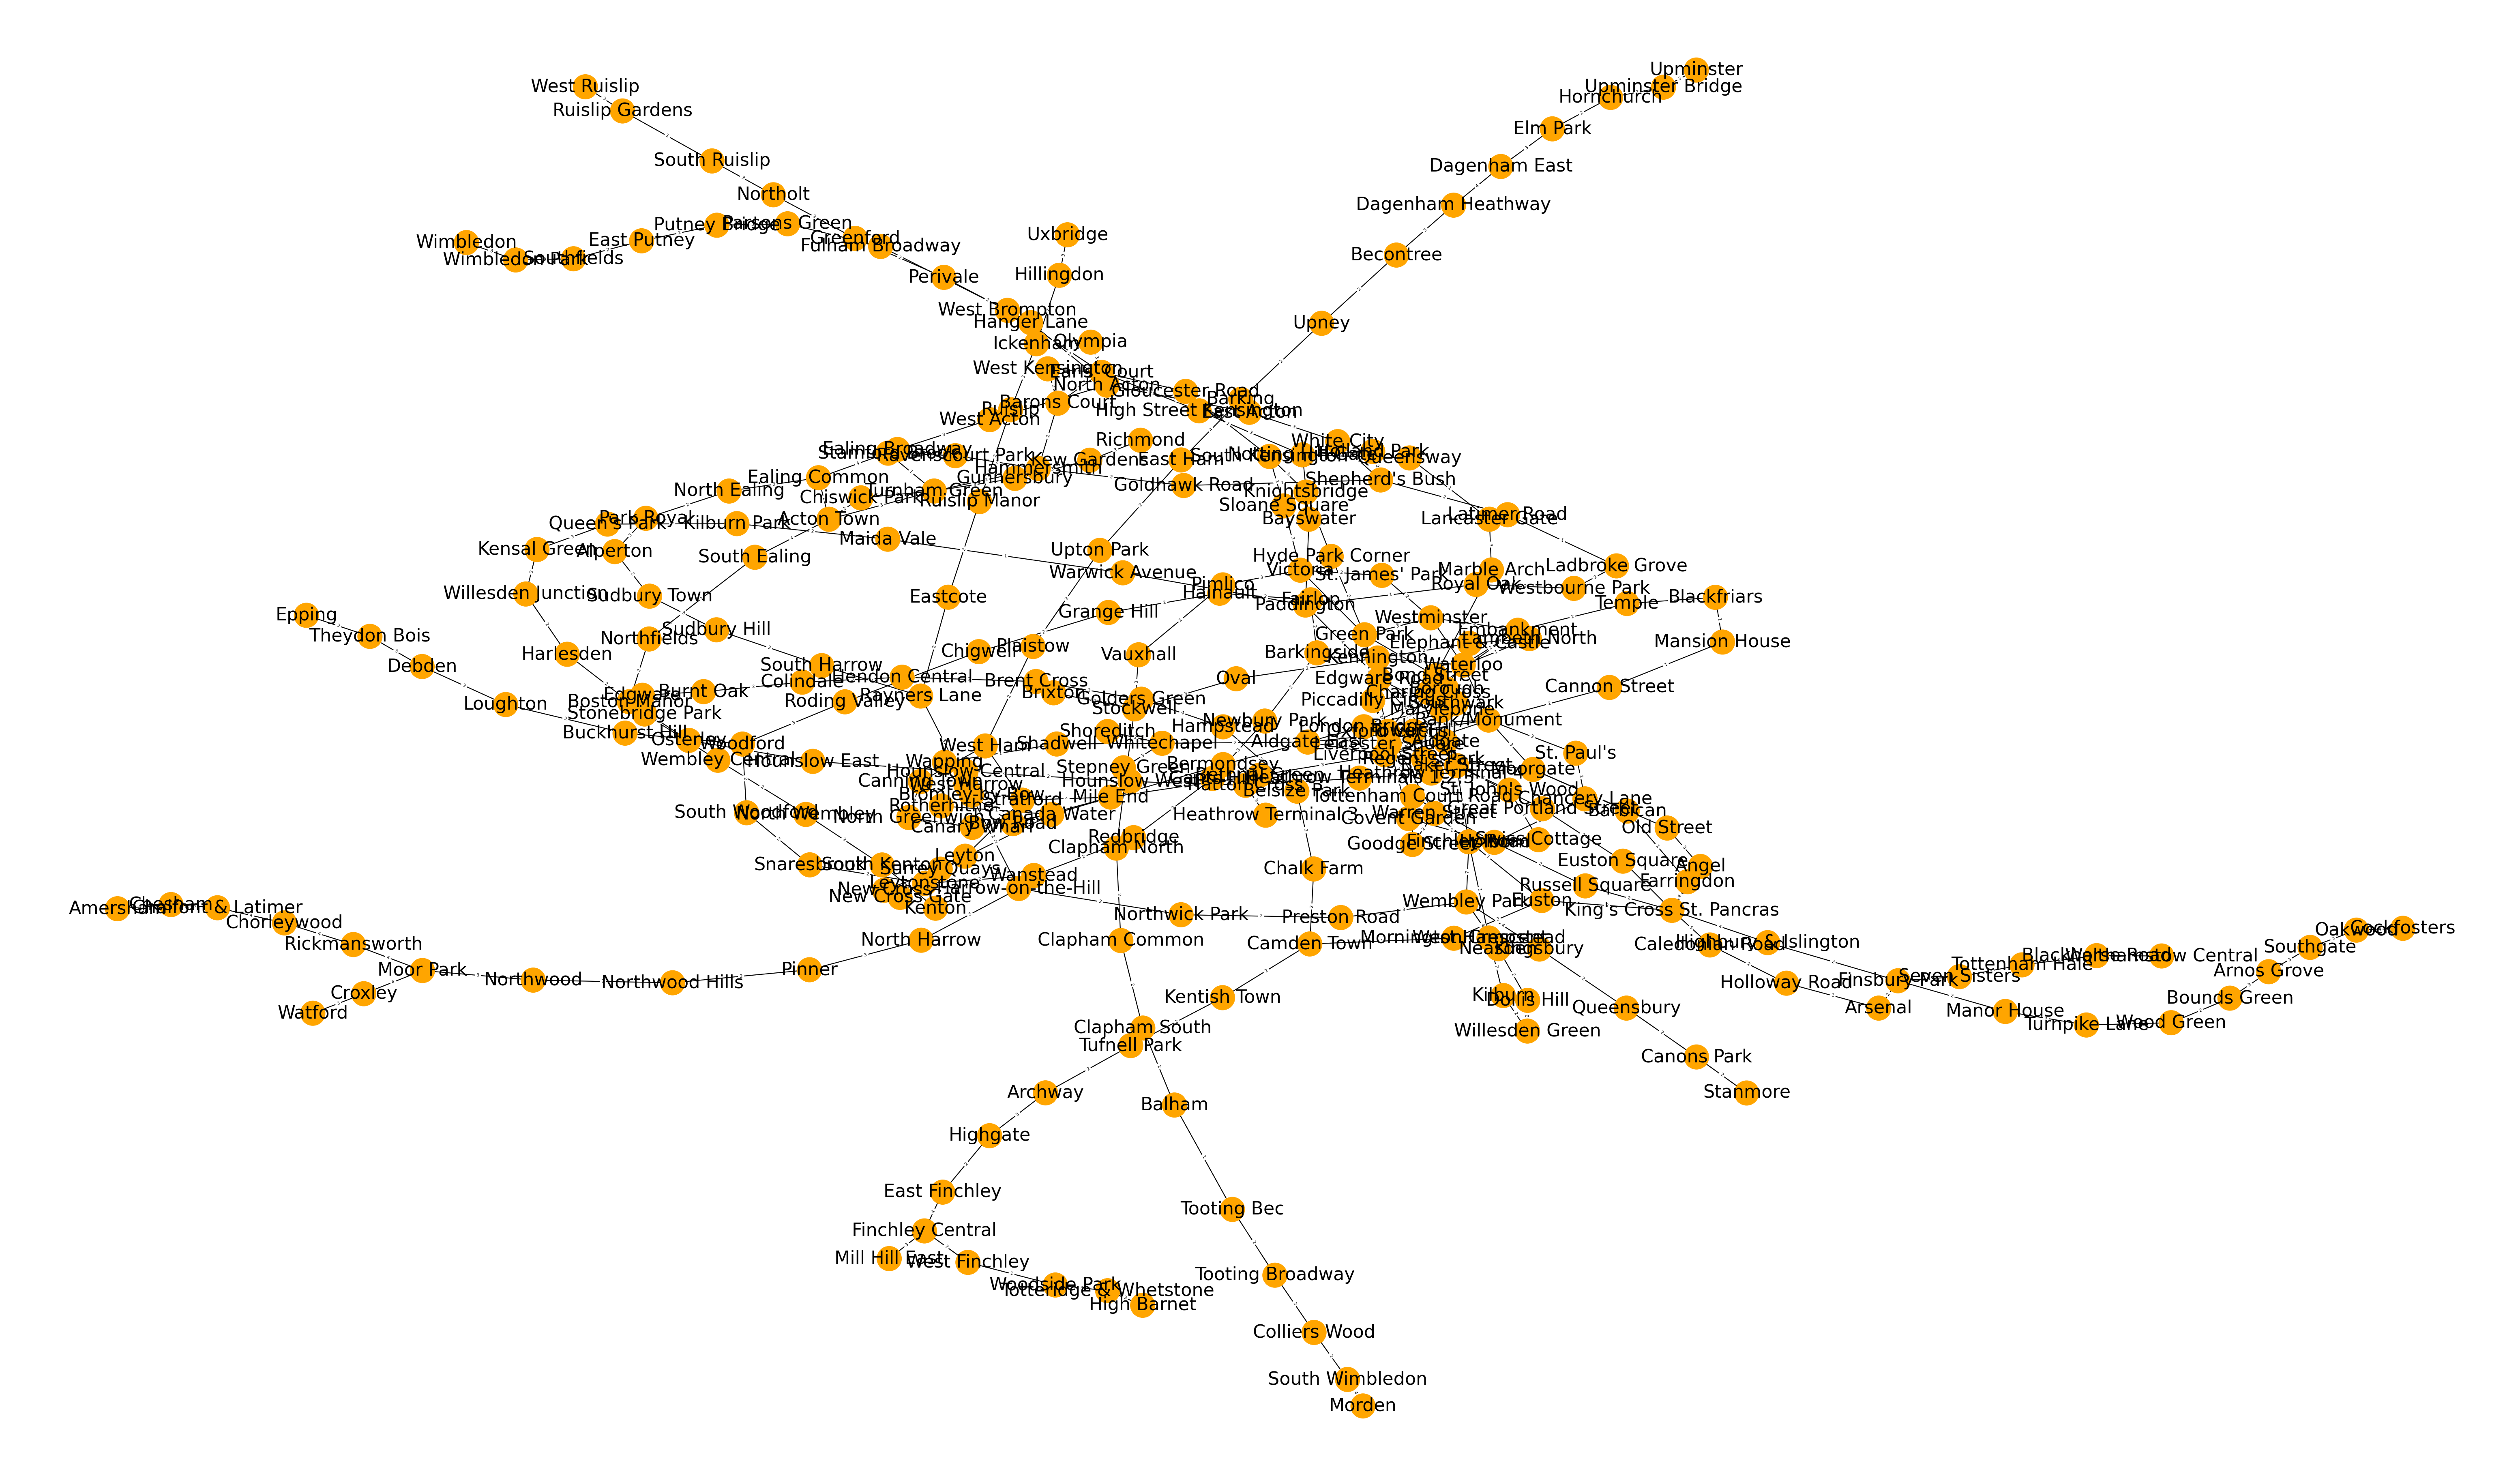

In [9]:
show_weighted_graph(nx.Graph(tube_dict), 3000, 40, (100, 60))

In [10]:
len(tube_dict.items())

270

In [11]:
def breadth_first_search(nxobject, initial, goal, compute_exploration_cost=False, reverse=False):
    if initial == goal:
        return None

    num_explored = 1
    node = (0, initial, [initial])
    frontier = [node]
    explored = {initial}

    while frontier:
        node = frontier.pop()

        neighbours = reversed(list(nxobject.neighbors(node[1]))) if reverse else nxobject.neighbors(node[1])
        
        path = node[2]
#         print(path)
        for child in neighbours:
            path.append(child)
            
            childNode = (node[0] + nxobject.get_edge_data(node[1], child)["weight"], child, path)
            if child == goal:
                if compute_exploration_cost:
                    print('number of explorations = {}'.format(num_explored))
                return childNode

            if child not in explored:
                frontier = [childNode] + frontier
                num_explored += 1
                explored.add(child)
            
            path = path[:-1]

    return None

In [12]:
solution = breadth_first_search(nx.Graph(tube_dict), 'Euston', 'Victoria', True)
print(solution)

number of explorations = 39
(7, 'Victoria', ['Euston', 'Warren Street', 'Oxford Circus', 'Green Park', 'Victoria'])


In [13]:
def depth_first_search(nxobject, initial, goal, compute_exploration_cost=False, reverse=False):
    node = (0, initial, [initial])
    frontier = [node]
    explored = {initial}
    num_explored = 1

    while frontier:
        node = frontier.pop()
        path = node[2]
        num_explored += 1
        if node[1] == goal:
            if compute_exploration_cost:
                print("Number of explorations are: ", num_explored)
            return node
        neighbours = reversed(list(nxobject.neighbors(node[1]))) if reverse else nxobject.neighbors(node[1])

        for child in neighbours:
            path.append(child)

            if child not in explored:
                childNode = (node[0] + nxobject.get_edge_data(node[1], child)["weight"], child, path)
                explored.add(child)
                frontier.append(childNode)
            
            path = path[:-1]
    return None


In [14]:
solution = depth_first_search(nx.Graph(tube_dict), 'Euston', 'Victoria', True)
print(solution)


Number of explorations are:  136
(15, 'Victoria', ['Euston', 'Warren Street', 'Goodge Street', 'Tottenham Court Road', 'Leicester Square', 'Charing Cross', 'Embankment', 'Westminster', 'Green Park', 'Victoria'])


In [15]:
def uniform_cost_search(nxobject, initial, goal, compute_exploration_cost=False, reverse=False):
    frontier = []
    frontierIndex = {}
    node = (0, initial, [initial])
    # Use a dictionary to keep track of the elements inside the frontier (queue)
    frontierIndex[node[1]] = [node[0], node[2]]

    heapq.heappush(frontier, node)
    explored = set()
    while frontier:
        if len(frontier) == 0:
            return None
        # Pop elemenet with lower path cost in the queue
        node = heapq.heappop(frontier)
        # Delete from the dicitonary the element that has beeen popped
        del frontierIndex[node[1]]

        if node[1] == goal:
            if compute_exploration_cost:
                    print('number of explorations = {}'.format(len(explored)))
            return node
        explored.add(node[1])
        # Get a list of all the child nodes of node
        neighbours = reversed(list(nxobject.neighbors(node[1]))) if reverse else nxobject.neighbors(node[1])
        path = node[2]
        for child in neighbours:
            path.append(child)
            # create the child node that will be inserted in frontier
            childWeight = nxobject.get_edge_data(node[1], child)["weight"]
            childNode = (node[0] + childWeight, child, path)
            # Check the child node is not explored and not in frontier thorugh the dictionary
            if child not in explored and child not in frontierIndex:
                heapq.heappush(frontier, childNode)
                frontierIndex[child] = [childNode[0], childNode[2]]
            elif child in frontierIndex: 
                # Checks if the child node has a lower path cost than the node already in frontier
                if childNode[0] < frontierIndex[child][0]:
                    nodeToRemove = (frontierIndex[child][0], child, frontierIndex[child][1])
                    frontier.remove(nodeToRemove)
                    heapq.heapify(frontier)
                    del frontierIndex[child]

                    heapq.heappush(frontier, childNode)
                    frontierIndex[child] = [childNode[0], childNode[2]]
            path = path[:-1]






In [16]:
solution = uniform_cost_search(nx.Graph(tube_dict) , 'Stratford', 'Wembley Park', True)
print(solution)

number of explorations = 178
(36, 'Wembley Park', ['Stratford', 'Mile End', 'Bethnal Green', 'Liverpool Street', 'Bank/Monument', "St. Paul's", 'Chancery Lane', 'Holborn', 'Tottenham Court Road', 'Oxford Circus', 'Bond Street', 'Baker Street', 'Finchley Road', 'Wembley Park'])


# Extending Cost Function

In [17]:
def check_tubeline(prev_line, cur_line):
    if prev_line != cur_line:
        return 1 
    return 0

In [18]:
def uniform_cost_search_extended_cost(nxobject, initial, goal, compute_exploration_cost=False, reverse=False):
    frontier = []
    frontierIndex = {}
    #       cost, start,  path,    tubeline
    node = (0, initial, [initial], '')
    frontierIndex[node[1]] = [node[0], node[2]]
    
    heapq.heappush(frontier, node)
    explored = set()
    
    while frontier:
        if len(frontier) == 0:
            return None

        node = heapq.heappop(frontier)

        del frontierIndex[node[1]]

        if node[1] == goal:
            if compute_exploration_cost:
                    print('number of explorations = {}'.format(len(explored)))
            return node
        explored.add(node[1])

        neighbours = reversed(list(nxobject.neighbors(node[1]))) if reverse else nxobject.neighbors(node[1])
        path = node[2]
        prev_tubeline = node[3]
        for child in neighbours:
            path.append(child)
            # create the child node that will be inserted in frontier
            childTubeline =  nxobject[node[1]][child]["tubeline"]
            childNode = (check_tubeline(prev_tubeline, childTubeline) + node[0], child, path, childTubeline)

            if child not in explored and child not in frontierIndex:
                heapq.heappush(frontier, childNode)
                frontierIndex[child] = [childNode[0], childNode[2], childNode[3]]
            elif child in frontierIndex: 

                if childNode[0] < frontierIndex[child][0]:
                    nodeToRemove = (frontierIndex[child][0], child, frontierIndex[child][1], frontierIndex[child][2])
                    frontier.remove(nodeToRemove)
                    heapq.heapify(frontier)
                    del frontierIndex[child]

                    heapq.heappush(frontier, childNode)
                    frontierIndex[child] = [childNode[0], childNode[2]]
            path = path[:-1]



In [19]:
solution = uniform_cost_search_extended_cost(nx.Graph(tube_dict) , 'Stratford', 'Wembley Park', True)
print(solution)

number of explorations = 149
(2, 'Wembley Park', ['Stratford', 'Mile End', 'Bethnal Green', 'Liverpool Street', 'Bank/Monument', "St. Paul's", 'Chancery Lane', 'Holborn', 'Tottenham Court Road', 'Oxford Circus', 'Bond Street', 'Baker Street', "St. John's Wood", 'Swiss Cottage', 'Finchley Road', 'West Hampstead', 'Kilburn', 'Willesden Green', 'Dollis Hill', 'Neasden', 'Wembley Park'], 'Jubilee')


# Hueristic implementation for the difference between two zones

In [20]:
zone_data = {}

for x in tube_file:
    if x[5] != 0:
        zone_data[x[0]] = list(set([x[4], x[5]]))
        zone_data[x[1]] = list(set([x[4], x[5]]))
    else:
        zone_data[x[0]] = [x[4]]
        zone_data[x[1]] = [x[4]]
        

In [21]:
zone_data

{'Kenton': [4],
 'South Kenton': [4],
 'North Wembley': [4],
 'Wembley Central': [4],
 'Stonebridge Park': [3],
 'Harlesden': [3],
 'Willesden Junction': [3],
 'Kensal Green': [2],
 "Queen's Park": [2],
 'Kilburn Park': [2],
 'Maida Vale': [2],
 'Warwick Avenue': [2],
 'Paddington': [1],
 'Edgware Road': [1],
 'Marylebone': [1],
 'Baker Street': [1],
 "Regent's Park": [1],
 'Oxford Circus': [1],
 'Piccadilly Circus': [1],
 'Charing Cross': [1],
 'Embankment': [1],
 'Waterloo': [1],
 'Lambeth North': [1],
 'Elephant & Castle': [1, 2],
 'West Ruislip': [6],
 'Ruislip Gardens': [5],
 'South Ruislip': [5],
 'Northolt': [5],
 'Greenford': [4],
 'Perivale': [4],
 'Hanger Lane': [3],
 'North Acton': [2, 3],
 'Ealing Broadway': [3],
 'West Acton': [3],
 'East Acton': [2],
 'White City': [2],
 "Shepherd's Bush": [2],
 'Holland Park': [2],
 'Notting Hill Gate': [1, 2],
 'Queensway': [1],
 'Lancaster Gate': [1],
 'Marble Arch': [1],
 'Bond Street': [1],
 'Tottenham Court Road': [1],
 'Holborn': [

In [22]:
def zone_heuristic(start, end, cost_so_far, zone_data):
    # both stations belong to one zone
    if len(zone_data[start]) == 1 and len(zone_data[end]) == 1:
        return cost_so_far + abs(zone_data[start][0] - zone_data[end][0])
    # one station belong to one zone, the other belongs to one or more zones
    elif len(zone_data[start]) > 1 and len(zone_data[end]) == 1:
        return cost_so_far + max(abs(zone_data[start][0] - zone_data[end][0]),
                              abs(zone_data[start][1] - zone_data[end][0]))
    elif len(zone_data[end]) > 1 and len(zone_data[start]) == 1:
        return cost_so_far + max(abs(zone_data[end][0] - zone_data[start][0]),
                              abs(zone_data[end][1] - zone_data[start][0]))
    # both station belongs to two or more stations
    elif len(zone_data[start]) > 1 and len(zone_data[end]) > 1:
        max1 = max(abs(zone_data[start][0] - zone_data[end][0]), abs(zone_data[start][0] - zone_data[end][1]))
        max2 = max(abs(zone_data[start][1] - zone_data[end][0]), abs(zone_data[start][1] - zone_data[end][1]))
        return cost_so_far + max(max1, max2)


In [23]:
def uniform_cost_search_with_heuristic(nxobject, initial, goal, compute_exploration_cost=False, reverse=False):
    frontier = []
    frontierIndex = {}
    #       cost, start,  path,    zone data
    zone_difference = zone_heuristic(initial, goal, 0, zone_data)
    node = (zone_difference, initial, [initial])

    frontierIndex[node[1]] = [node[0], node[2]]

    heapq.heappush(frontier, node)
    explored = set()
    
    while frontier:
        if len(frontier) == 0:
            return None

        node = heapq.heappop(frontier)

        del frontierIndex[node[1]]

        if node[1] == goal:
            if compute_exploration_cost:
                    print('number of explorations = {}'.format(len(explored)))
            return node
        explored.add(node[1])

        neighbours = reversed(list(nxobject.neighbors(node[1]))) if reverse else nxobject.neighbors(node[1])
        path = node[2]
        for child in neighbours:
            path.append(child)

            childWeight = nxobject.get_edge_data(node[1], child)["weight"]
            childNode = (zone_heuristic(child, goal, node[0] + childWeight, zone_data), child, path)

            if child not in explored and child not in frontierIndex:
                heapq.heappush(frontier, childNode)
                frontierIndex[child] = [childNode[0], childNode[2]]
            elif child in frontierIndex: 
                if childNode[0] < frontierIndex[child][0]:
                    nodeToRemove = (frontierIndex[child][0], child, frontierIndex[child][1])
                    frontier.remove(nodeToRemove)
                    heapq.heapify(frontier)
                    del frontierIndex[child]

                    heapq.heappush(frontier, childNode)
                    frontierIndex[child] = [childNode[0], childNode[2]]
            path = path[:-1]


In [24]:
solution = uniform_cost_search_with_heuristic(nx.Graph(tube_dict) , 'Canada Water', 'Stratford', True)
print(solution)

number of explorations = 30
(18, 'Stratford', ['Canada Water', 'Canary Wharf', 'North Greenwich', 'Canning Town', 'West Ham', 'Stratford'])


# Comparisons


In [25]:
tube_graph = nx.Graph(tube_dict)

reverse = False
display = True
problems=[(tube_graph, 'Canada Water', 'Stratford', display, reverse),
          (tube_graph, 'New Cross Gate', 'Stepney Green', display, reverse),
          (tube_graph, 'Ealing Broadway', 'South Kensington', display, reverse),
          (tube_graph, 'Baker Street', 'Wembley Park', display, reverse),]

print("=== BFS ===")
for p in problems:
    solution = breadth_first_search(p[0], p[1], p[2], p[3], p[4])
    print(solution, "\n")
print("==============\n" * 3)

print("=== DFS ===")
for p in problems:
    solution = depth_first_search(p[0], p[1], p[2], p[3], p[4])
    print(solution, "\n")
print("==============\n" * 3)

print("=== UCS ===")
for p in problems:
    solution = uniform_cost_search(p[0], p[1], p[2], p[3], p[4])
    print(solution, "\n")
print("==============\n" * 3)


=== BFS ===
number of explorations = 37
(15, 'Stratford', ['Canada Water', 'Canary Wharf', 'North Greenwich', 'Canning Town', 'West Ham', 'Stratford']) 

number of explorations = 25
(14, 'Stepney Green', ['New Cross Gate', 'Surrey Quays', 'Canada Water', 'Rotherhithe', 'Wapping', 'Shadwell', 'Whitechapel', 'Stepney Green']) 

number of explorations = 48
(20, 'South Kensington', ['Ealing Broadway', 'Ealing Common', 'Acton Town', 'Turnham Green', 'Hammersmith', 'Barons Court', "Earls' Court", 'Gloucester Road', 'South Kensington']) 

number of explorations = 14
(13, 'Wembley Park', ['Baker Street', 'Finchley Road', 'Wembley Park']) 


=== DFS ===
Number of explorations are:  246
(15, 'Stratford', ['Canada Water', 'Canary Wharf', 'North Greenwich', 'Canning Town', 'West Ham', 'Stratford']) 

Number of explorations are:  25
(25, 'Stepney Green', ['New Cross Gate', 'Surrey Quays', 'Canada Water', 'Canary Wharf', 'North Greenwich', 'Canning Town', 'West Ham', 'Bromley-by-Bow', 'Bow Road', 'M

In [26]:
tube_graph = nx.Graph(tube_dict)

reverse = False
display = True
problems=[(tube_graph, 'Canada Water', 'Stratford', display, reverse),
          (tube_graph, 'New Cross Gate', 'Stepney Green', display, reverse),
          (tube_graph, 'Ealing Broadway', 'South Kensington', display, reverse),
          (tube_graph, 'Baker Street', 'Wembley Park', display, reverse),]

print("=== UCS with a different cost function ===")
for p in problems:
    solution = uniform_cost_search_extended_cost(p[0], p[1], p[2], p[3], p[4])
    print(solution, "\n")
print("==============\n" * 3)

=== UCS with a different cost function ===
number of explorations = 15
(1, 'Stratford', ['Canada Water', 'Canary Wharf', 'North Greenwich', 'Canning Town', 'West Ham', 'Stratford'], 'Jubilee') 

number of explorations = 17
(2, 'Stepney Green', ['New Cross Gate', 'Surrey Quays', 'Canada Water', 'Rotherhithe', 'Wapping', 'Shadwell', 'Whitechapel', 'Stepney Green'], 'Hammersmith & City') 

number of explorations = 212
(3, 'South Kensington', ['Ealing Broadway', 'West Acton', 'North Acton', 'East Acton', 'White City', "Shepherd's Bush", 'Holland Park', 'Notting Hill Gate', 'Queensway', 'Lancaster Gate', 'Marble Arch', 'Bond Street', 'Green Park', 'Hyde Park Corner', 'Knightsbridge', 'South Kensington'], 'Piccadilly') 

number of explorations = 22
(1, 'Wembley Park', ['Baker Street', 'Finchley Road', 'Wembley Park'], 'Metropolitan') 




In [27]:
tube_graph = nx.Graph(tube_dict)

reverse = False
display = True
problems=[(tube_graph, 'Canada Water', 'Stratford', display, reverse),
          (tube_graph, 'New Cross Gate', 'Stepney Green', display, reverse),
          (tube_graph, 'Ealing Broadway', 'South Kensington', display, reverse),
          (tube_graph, 'Baker Street', 'Wembley Park', display, reverse),]

print("=== UCS vanilla ===")
for p in problems:
    solution = uniform_cost_search(p[0], p[1], p[2], p[3], p[4])
    print(solution, "\n")
print("==============\n" * 3)

print("=== UCS with a huerisitc function ===")
for p in problems:
    solution = uniform_cost_search_with_heuristic(p[0], p[1], p[2], p[3], p[4])
    print(solution, "\n")
print("==============\n" * 3)

=== UCS vanilla ===
number of explorations = 54
(14, 'Stratford', ['Canada Water', 'Rotherhithe', 'Wapping', 'Shadwell', 'Whitechapel', 'Stepney Green', 'Mile End', 'Stratford']) 

number of explorations = 18
(14, 'Stepney Green', ['New Cross Gate', 'Surrey Quays', 'Canada Water', 'Rotherhithe', 'Wapping', 'Shadwell', 'Whitechapel', 'Stepney Green']) 

number of explorations = 52
(20, 'South Kensington', ['Ealing Broadway', 'Ealing Common', 'Acton Town', 'Turnham Green', 'Hammersmith', 'Barons Court', "Earls' Court", 'Gloucester Road', 'South Kensington']) 

number of explorations = 82
(13, 'Wembley Park', ['Baker Street', 'Finchley Road', 'Wembley Park']) 


=== UCS with a huerisitc function ===
number of explorations = 30
(18, 'Stratford', ['Canada Water', 'Canary Wharf', 'North Greenwich', 'Canning Town', 'West Ham', 'Stratford']) 

number of explorations = 14
(14, 'Stepney Green', ['New Cross Gate', 'Surrey Quays', 'Canada Water', 'Rotherhithe', 'Wapping', 'Shadwell', 'Whitechapel'

# Timing the algorithms

In [28]:
%%timeit

depth_first_search(nx.Graph(tube_dict) , 'Stratford', 'Victoria', False)

833 µs ± 32.3 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [29]:
%%timeit

breadth_first_search(nx.Graph(tube_dict) , 'Stratford', 'Victoria', False)

886 µs ± 115 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [30]:
%%timeit
uniform_cost_search(nx.Graph(tube_dict) , 'Stratford', 'Victoria', False)


892 µs ± 66.5 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [31]:
%%timeit

uniform_cost_search_extended_cost(nx.Graph(tube_dict) , 'Stratford', 'Victoria', False)


1.3 ms ± 86.2 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [32]:
%%timeit

uniform_cost_search_with_heuristic(nx.Graph(tube_dict) , 'Stratford', 'Victoria', False)

882 µs ± 3.41 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
